In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 

In [ ]:
df= pd.read_csv('crx.data', names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])

In [ ]:
important_cols = ['A2', 'A3', 'A8', 'A14', 'A13','A15','A16']

In [ ]:
df = df[important_cols] 

In [ ]:
df.head() 

,A2,A3,A8,A14,A13,A15,A16
0,30.83,0.000,1.25,00202,g,0,+
1,58.67,4.460,3.04,00043,g,560,+
2,24.50,0.500,1.50,00280,g,824,+
3,27.83,1.540,3.75,00100,g,3,+
4,20.17,5.625,1.71,00120,s,0,+


In [ ]:
df = df.query("A2 != '?'") 
df = df.query("A14 != '?'")

In [ ]:
df['A14']= df['A14'].astype(float, errors = 'raise') 
df['A2']= df['A2'].astype(float, errors = 'raise')

In [ ]:
string_cols = df.select_dtypes(['object']).columns
df[string_cols] = df[string_cols].astype('category').apply(lambda x: x.cat.codes) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 0 to 689
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      666 non-null    float64
 1   A3      666 non-null    float64
 2   A8      666 non-null    float64
 3   A14     666 non-null    float64
 4   A13     666 non-null    int8   
 5   A15     666 non-null    int64  
 6   A16     666 non-null    int8   
dtypes: float64(4), int64(1), int8(2)
memory usage: 32.5 KB


In [ ]:
df.corr()

,A2,A3,A8,A14,A13,A15,A16
A2,1.000000,0.211249,0.404847,-0.079812,-0.020551,0.027512,-0.163244
A3,0.211249,1.000000,0.303990,-0.217364,-0.104610,0.120021,-0.213328
A8,0.404847,0.303990,1.000000,-0.069020,-0.006071,0.053009,-0.335199
A14,-0.079812,-0.217364,-0.069020,1.000000,0.074236,0.069396,0.092521
A13,-0.020551,-0.104610,-0.006071,0.074236,1.000000,-0.006163,0.105391
A15,0.027512,0.120021,0.053009,0.069396,-0.006163,1.000000,-0.172884
A16,-0.163244,-0.213328,-0.335199,0.092521,0.105391,-0.172884,1.000000


In [ ]:
X_data= df.drop('A16', axis=1) 
y_data=df['A16'] 

In [ ]:
standarscal= StandardScaler() 
X_data = standarscal.fit_transform(X_data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=False) 

In [ ]:
dict_result={} 

KNN

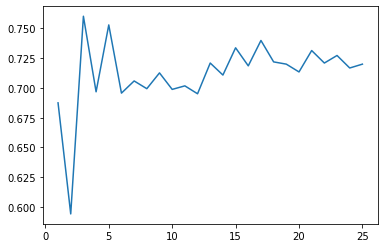

In [ ]:
k_range = list(range(1, 26))
scores = [] 
for i in k_range: 
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    scores.append(f1_score(y_test, y_pred)) 
plt.plot(k_range, scores) 
plt.show()

Видим, что лучший результат модель дает при количестве n=3

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precc = precision_score(y_test, y_pred)
print('F1 score: ', f1)
print('Recall: ', rec)
print('precission: ', precc)

F1 score:  0.760233918128655
Recall:  0.7738095238095238
precission:  0.7471264367816092


Мы использовали метрику полноты(Recall), точности(Precission) и метрику f1_score. Recall полноту всех найденных елементов. F1- среднее значение между полнотой и точностью. Precission - точность найденных значений.